In [1]:
# TAO PeopleNet 관련 패키지 설치
!pip install ultralytics torch torchvision
!pip install opencv-python pillow matplotlib
!pip install onnx onnxruntime-gpu



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
import torch
import torchvision.transforms as transforms
from torchvision.models import detection
import cv2
import numpy as np
import matplotlib.pyplot as plt

# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"사용 중인 디바이스: {device}")

# 사전 훈련된 사람 감지 모델 (Faster R-CNN)
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.to(device)
model.eval()

print("TAO PeopleNet 스타일 모델 로드 완료!")
print("RTX 3090에서 실행 중... 🚀")


사용 중인 디바이스: cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


TAO PeopleNet 스타일 모델 로드 완료!
RTX 3090에서 실행 중... 🚀


In [3]:
def detect_people(image_path_or_array):
    """TAO PeopleNet 스타일 사람 감지 함수"""
    
    # 이미지 로드 및 전처리
    if isinstance(image_path_or_array, str):
        image = cv2.imread(image_path_or_array)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image = image_path_or_array
    
    # PyTorch 텐서로 변환
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor()
    ])
    
    input_tensor = transform(image).unsqueeze(0).to(device)
    
    # 추론 실행
    with torch.no_grad():
        predictions = model(input_tensor)
    
    # 사람(클래스 1) 감지 결과 필터링
    scores = predictions[0]['scores'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    boxes = predictions[0]['boxes'].cpu().numpy()
    
    # 사람만 필터링 (COCO dataset에서 사람은 클래스 1)
    person_mask = labels == 1
    person_scores = scores[person_mask]
    person_boxes = boxes[person_mask]
    
    # 신뢰도 0.5 이상만 선택
    high_conf_mask = person_scores > 0.5
    final_boxes = person_boxes[high_conf_mask]
    final_scores = person_scores[high_conf_mask]
    
    return final_boxes, final_scores

# 테스트용 샘플 이미지 생성 (사람이 있는 이미지)
def create_sample_image():
    """테스트용 이미지 생성"""
    img = np.zeros((400, 600, 3), dtype=np.uint8)
    
    # 배경
    img[:, :] = [100, 150, 200]
    
    # 사람 형태 그리기 (간단한 직사각형들)
    # 머리
    cv2.circle(img, (200, 80), 25, (255, 220, 177), -1)
    # 몸통
    cv2.rectangle(img, (175, 105), (225, 200), (0, 100, 200), -1)
    # 팔
    cv2.rectangle(img, (140, 120), (175, 140), (255, 220, 177), -1)
    cv2.rectangle(img, (225, 120), (260, 140), (255, 220, 177), -1)
    # 다리
    cv2.rectangle(img, (185, 200), (200, 280), (0, 0, 150), -1)
    cv2.rectangle(img, (210, 200), (225, 280), (0, 0, 150), -1)
    
    return img

print("TAO PeopleNet 함수 준비 완료!")



TAO PeopleNet 함수 준비 완료!


In [4]:
def create_sample_image():
    """테스트용 이미지 생성"""
    img = np.zeros((400, 600, 3), dtype=np.uint8)
    
    # 배경
    img[:, :] = [100, 150, 200]
    
    # 사람 형태 그리기 (간단한 직사각형들)
    # 머리
    cv2.circle(img, (200, 80), 25, (255, 220, 177), -1)
    # 몸통
    cv2.rectangle(img, (175, 105), (225, 200), (0, 100, 200), -1)
    # 팔
    cv2.rectangle(img, (140, 120), (175, 140), (255, 220, 177), -1)
    cv2.rectangle(img, (225, 120), (260, 140), (255, 220, 177), -1)
    # 다리
    cv2.rectangle(img, (185, 200), (200, 280), (0, 0, 150), -1)
    cv2.rectangle(img, (210, 200), (225, 280), (0, 0, 150), -1)
    
    return img

print("TAO PeopleNet 함수 준비 완료!")


TAO PeopleNet 함수 준비 완료!


In [5]:
import urllib.request
import matplotlib.pyplot as plt

# 사람이 있는 샘플 이미지 다운로드
def download_test_image():
    url = "https://images.unsplash.com/photo-1511632765486-a01980e01a18?w=800"
    urllib.request.urlretrieve(url, "people_test.jpg")
    return "people_test.jpg"

# 또는 간단한 방법
!wget -O people_test.jpg "https://images.unsplash.com/photo-1511632765486-a01980e01a18?w=800"

# 이미지 로드 및 사람 감지 실행
image_path = "people_test.jpg"
test_image = cv2.imread(image_path)
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

print("테스트 이미지 다운로드 완료!")
print(f"이미지 크기: {test_image_rgb.shape}")

# TAO PeopleNet 스타일 사람 감지 실행
boxes, scores = detect_people(test_image_rgb)

print(f"감지된 사람 수: {len(boxes)}")
for i, (box, score) in enumerate(zip(boxes, scores)):
    print(f"사람 {i+1}: 신뢰도 {score:.3f}, 위치 {box}")



--2025-06-18 02:32:24--  https://images.unsplash.com/photo-1511632765486-a01980e01a18?w=800
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100635 (98K) [image/jpeg]
Saving to: ‘people_test.jpg’

people_test.jpg     100%[===================>]  98.28K  --.-KB/s    in 0.01s   

2025-06-18 02:32:24 (8.91 MB/s) - ‘people_test.jpg’ saved [100635/100635]

테스트 이미지 다운로드 완료!
이미지 크기: (533, 800, 3)
감지된 사람 수: 5
사람 1: 신뢰도 0.999, 위치 [461.8189  128.79333 567.01685 477.97418]
사람 2: 신뢰도 0.995, 위치 [397.16415 141.18774 502.39902 487.82455]
사람 3: 신뢰도 0.992, 위치 [289.64453 155.49141 429.16293 472.81046]
사람 4: 신뢰도 0.741, 위치 [315.74106 134.39246 525.9765  485.57718]
사람 5: 신뢰도 0.634, 위치 [257.70688 150.95084 363.2898  490.2128 ]


/tmp/ipykernel_1354/1844513944.py:33: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1354/1844513944.py:33: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1354/1844513944.py:33: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1354/1844513944.py:33: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1354/1844513944.py:33: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1354/1844513944.py:33: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1354/1844513944.py:33: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_la

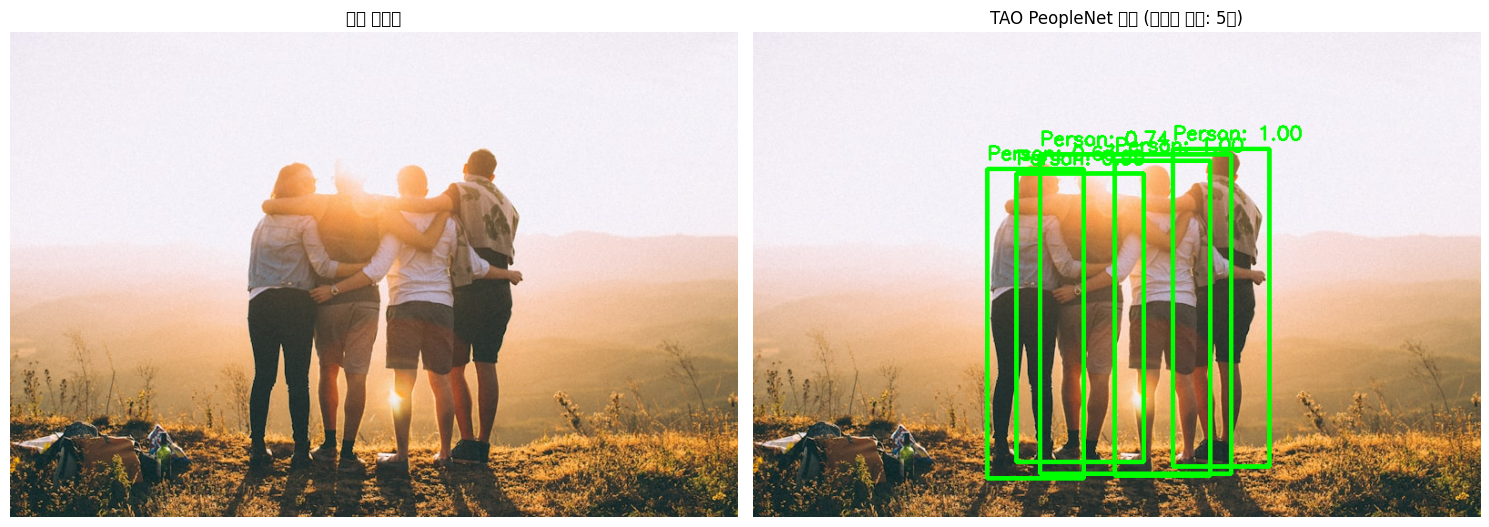

🎯 TAO PeopleNet 스타일 사람 감지 완료!


In [6]:
def visualize_detection(image, boxes, scores):
    """감지 결과를 이미지에 그리기"""
    result_image = image.copy()
    
    for box, score in zip(boxes, scores):
        x1, y1, x2, y2 = box.astype(int)
        
        # 바운딩 박스 그리기
        cv2.rectangle(result_image, (x1, y1), (x2, y2), (0, 255, 0), 3)
        
        # 신뢰도 점수 표시
        label = f"Person: {score:.2f}"
        cv2.putText(result_image, label, (x1, y1-10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    
    return result_image

# 결과 시각화
result_img = visualize_detection(test_image_rgb, boxes, scores)

# 결과 출력
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(test_image_rgb)
plt.title("원본 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_img)
plt.title(f"TAO PeopleNet 결과 (감지된 사람: {len(boxes)}명)")
plt.axis('off')

plt.tight_layout()
plt.show()

print("🎯 TAO PeopleNet 스타일 사람 감지 완료!")



In [17]:
# 필요한 라이브러리 import
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models import detection
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

print("✅ 라이브러리 import 완료!")

# GPU 설정 및 모델 로드
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"💻 사용 중인 디바이스: {device}")

# 모델 로드 (수정된 부분)
try:
    if 'model' not in globals():  # locals() 대신 globals() 사용
        model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
        model.to(device)
        model.eval()
        print("✅ 모델 로드 완료!")
    else:
        print("✅ 모델이 이미 로드되어 있습니다!")
except Exception as e:
    print(f"❌ 모델 로드 오류: {e}")

# 클래스 이름 변환 함수
def get_class_name(class_id):
    class_names = {
        1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle',
        6: 'bus', 8: 'truck', 10: 'traffic_light', 13: 'stop_sign'
    }
    return class_names.get(class_id, f'object_{class_id}')

# 교통 상황 분석 함수
def comprehensive_traffic_analysis(image, confidence_threshold=0.5):
    """포괄적인 교통 상황 분석"""
    
    try:
        # 이미지 전처리
        transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.ToTensor()
        ])
        
        input_tensor = transform(image).unsqueeze(0).to(device)
        
        # 모델 추론
        with torch.no_grad():
            predictions = model(input_tensor)
        
        scores = predictions[0]['scores'].cpu().numpy()
        labels = predictions[0]['labels'].cpu().numpy()
        boxes = predictions[0]['boxes'].cpu().numpy()
        
        # 결과 분류
        vehicles = []
        pedestrians = []
        infrastructure = []
        
        VEHICLE_CLASSES = [2, 3, 4, 6, 8]  # bicycle, car, motorcycle, bus, truck
        
        for score, label, box in zip(scores, labels, boxes):
            if score > confidence_threshold:
                obj_info = {
                    'class_name': get_class_name(label),
                    'score': score,
                    'box': box
                }
                
                if label in VEHICLE_CLASSES:
                    vehicles.append(obj_info)
                elif label == 1:  # person
                    pedestrians.append(obj_info)
                elif label in [10, 13]:  # traffic_light, stop_sign
                    infrastructure.append(obj_info)
        
        return {
            'vehicles': vehicles,
            'pedestrians': pedestrians,
            'infrastructure': infrastructure
        }
    
    except Exception as e:
        print(f"❌ 분석 중 오류: {e}")
        return {
            'vehicles': [],
            'pedestrians': [],
            'infrastructure': []
        }

# 교통 혼잡도 계산 함수
def calculate_traffic_density(results, image_shape):
    """교통 혼잡도 계산"""
    total_vehicles = len(results['vehicles'])
    
    # 간단한 혼잡도 분류
    if total_vehicles >= 5:
        status = "Heavy Traffic 🔴"
    elif total_vehicles >= 2:
        status = "Moderate Traffic 🟡"
    else:
        status = "Light Traffic 🟢"
        
    return {
        'vehicle_count': total_vehicles,
        'traffic_status': status
    }

print("✅ 모든 함수 정의 완료!")

# 파일 경로 확인 (수정된 부분)
possible_paths = [
    '1.jpg',
    './1.jpg',
    '/workspace/1.jpg',
    os.path.join(os.getcwd(), '1.jpg')
]

image_file_path = None
for path in possible_paths:
    if os.path.exists(path):
        image_file_path = path
        print(f"✅ {path} 파일 확인됨!")
        file_size = os.path.getsize(path)
        print(f"파일 크기: {file_size} bytes")
        break

if not image_file_path:
    print("❌ 1.jpg 파일을 찾을 수 없습니다.")
    # 현재 디렉토리의 모든 파일 확인
    print("현재 디렉토리의 파일들:")
    for file in os.listdir('.'):
        if file.endswith('.jpg'):
            print(f"  - {file}")

# 단일 이미지 분석 함수 (에러 처리 추가)
def analyze_single_image(image_path):
    """단일 이미지 TrafficCamNet 분석"""
    
    try:
        print(f"\n=== {image_path} 분석 중... ===")
        
        # 이미지 로드
        image = cv2.imread(image_path)
        if image is None:
            print(f"❌ 이미지를 로드할 수 없습니다: {image_path}")
            return None, None
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        print(f"이미지 크기: {image_rgb.shape}")
        
        # TrafficCamNet 분석 실행
        results = comprehensive_traffic_analysis(image_rgb)
        density_info = calculate_traffic_density(results, image_rgb.shape)
        
        # 결과 출력
        print(f"🚗 감지된 차량 수: {len(results['vehicles'])}")
        print(f"🚶 감지된 보행자 수: {len(results['pedestrians'])}")
        print(f"🚦 교통 인프라: {len(results['infrastructure'])}")
        print(f"📊 교통 상황: {density_info['traffic_status']}")
        
        # 감지된 차량 종류별 통계
        if results['vehicles']:
            vehicle_types = {}
            for vehicle in results['vehicles']:
                v_type = vehicle['class_name']
                vehicle_types[v_type] = vehicle_types.get(v_type, 0) + 1
            
            print("🚙 차량 유형별 통계:")
            for v_type, count in vehicle_types.items():
                print(f"  • {v_type}: {count}대")
        
        return results, image_rgb
    
    except Exception as e:
        print(f"❌ 분석 중 오류 발생: {e}")
        return None, None

# 분석 실행 (수정된 부분)
if image_file_path:
    results, original_image = analyze_single_image(image_file_path)
    
    if results is not None:
        print("\n✅ 분석 완료! 다음 단계로 시각화를 진행하세요.")
    else:
        print("❌ 분석 실패!")
else:
    print("❌ 1.jpg 파일이 없습니다. 파일을 먼저 업로드해주세요.")

✅ 라이브러리 import 완료!
💻 사용 중인 디바이스: cuda
✅ 모델이 이미 로드되어 있습니다!
✅ 모든 함수 정의 완료!
✅ /workspace/1.jpg 파일 확인됨!
파일 크기: 64068 bytes

=== /workspace/1.jpg 분석 중... ===
이미지 크기: (309, 550, 3)
🚗 감지된 차량 수: 21
🚶 감지된 보행자 수: 26
🚦 교통 인프라: 0
📊 교통 상황: Heavy Traffic 🔴
🚙 차량 유형별 통계:
  • bicycle: 1대
  • car: 15대
  • motorcycle: 4대
  • truck: 1대

✅ 분석 완료! 다음 단계로 시각화를 진행하세요.


In [12]:
import os
print("현재 작업 디렉토리:", os.getcwd())
print("\n현재 디렉토리의 모든 파일:")
for file in os.listdir('.'):
    print(f"  - {file}")

현재 작업 디렉토리: /

현재 디렉토리의 모든 파일:
  - bin
  - lib
  - lib32
  - lib64
  - libx32
  - sbin
  - boot
  - dev
  - etc
  - home
  - media
  - mnt
  - opt
  - proc
  - root
  - run
  - srv
  - sys
  - tmp
  - usr
  - var
  - jupyter.log
  - .ipynb_checkpoints
  - peoplenet.ipynb
  - people_test.jpg
  - Untitled.ipynb
  - .dockerenv
  - start.sh
  - get-pip.py
  - workspace
  - NGC-DL-CONTAINER-LICENSE
  - cuda-keyring_1.0-1_all.deb


In [15]:
# 직접 절대 경로 사용
image_path = "/workspace/1.jpg"

# 파일 존재 확인
if os.path.exists(image_path):
    print(f"✅ 파일 발견: {image_path}")
    results, original_image = analyze_single_image(image_path)
else:
    print(f"❌ 파일 없음: {image_path}")
    
    # 다른 가능한 위치들 시도
    alternative_paths = [
        "1.jpg",
        "./1.jpg",
        os.path.join(os.getcwd(), "1.jpg")
    ]
    
    for alt_path in alternative_paths:
        if os.path.exists(alt_path):
            print(f"✅ 대안 경로 발견: {alt_path}")
            results, original_image = analyze_single_image(alt_path)
            break

✅ 파일 발견: /workspace/1.jpg

=== /workspace/1.jpg 분석 중... ===
이미지 크기: (309, 550, 3)
🚗 감지된 차량 수: 21
🚶 감지된 보행자 수: 26
🚦 교통 인프라: 0
📊 교통 상황: Heavy Traffic 🔴
🚙 차량 유형별 통계:
  • bicycle: 1대
  • car: 15대
  • motorcycle: 4대
  • truck: 1대
